In [1]:
import uproot
import awkward as ak
import numpy as np
import glob
import time
from pathlib import Path
from multiprocessing import Pool
import matplotlib.pyplot as plt
import os
from tqdm.auto import tqdm

import sys

REPO_PATH = Path.home() / "workspace/jetpointnet"
SCRIPT_PATH = REPO_PATH / "python_scripts"
sys.path.append(str(SCRIPT_PATH))


from data_processing.jets.preprocessing_header import *
from data_processing.jets.awk_utils import *
from data_processing.jets.common_utils import *

import sys
from pathlib import Path

REPO_PATH = Path.home() / "workspace/jetpointnet"
SCRIPT_PATH = REPO_PATH / "python_scripts"

sys.path.append(str(SCRIPT_PATH))



import awkward as ak
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import os
import time
from tqdm.auto import tqdm
from multiprocessing import Pool


In [17]:
def read_parquet(filename):
    table = pq.read_table(filename)
    ak_array = ak.from_arrow(table)
    return ak_array

awk_file = "/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_9_pt_norm_fix/AwkwardArrs/deltaR=0.2/train/rho/user.mswiatlo.40097513._000010.mltree.root_chunk_0_train.parquet"
awk_arr = read_parquet(awk_file)
awk_arr

<Array [[{trackID: 0, ...}], ..., [{...}]] type='415 * var * {trackID: int6...'>

In [18]:
awk_arr['total_sample_track_pt']

<Array [[6.51], [67.7], [...], ..., [1.27], [0.789]] type='415 * var * float64'>

In [23]:
def viz_awk(ak_array,focal_event_index=0,focal_track_index=0):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    #ax.set_xlim(-4000,4000)
    ##ax.set_ylim(-7000,7000)
    #ax.set_zlim(-4000,4000)
    #ax.set_aspect('equal')
    # ax.set_title("ATLAS Radial Calorimeters")
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Z Coordinate')  
    ax.set_zlabel('Y Coordinate')  
    plt.tight_layout()

    window = ak_array[focal_event_index][focal_track_index]

    plt.title(f"Event: {window['eventNumber']}, nCells={len(list(window['associated_cells']['X']))}, total_Pt={window['total_sample_track_pt']:.2f}")

    # add focal track
    ax.plot(list(window['track_layer_intersections']['X']), list(window['track_layer_intersections']['Y']), list(window['track_layer_intersections']['Z']), label=f"focal, pT={window['trackPt']:.2f}")

    # add adj tracks
    for adj_track in window['associated_tracks']:
        ax.plot(list(adj_track['track_layer_intersections']['X']), 
                list(adj_track['track_layer_intersections']['Y']), 
                list(adj_track['track_layer_intersections']['Z']), 
                label=f"Pt={adj_track['trackPt']}")

    ax.scatter(list(window['associated_cells']['X']), list(window['associated_cells']['Y']), list(window['associated_cells']['Z']), s=3, marker='.')


    ax.scatter(0, 0, 0, label='Origin')
    ax.legend()

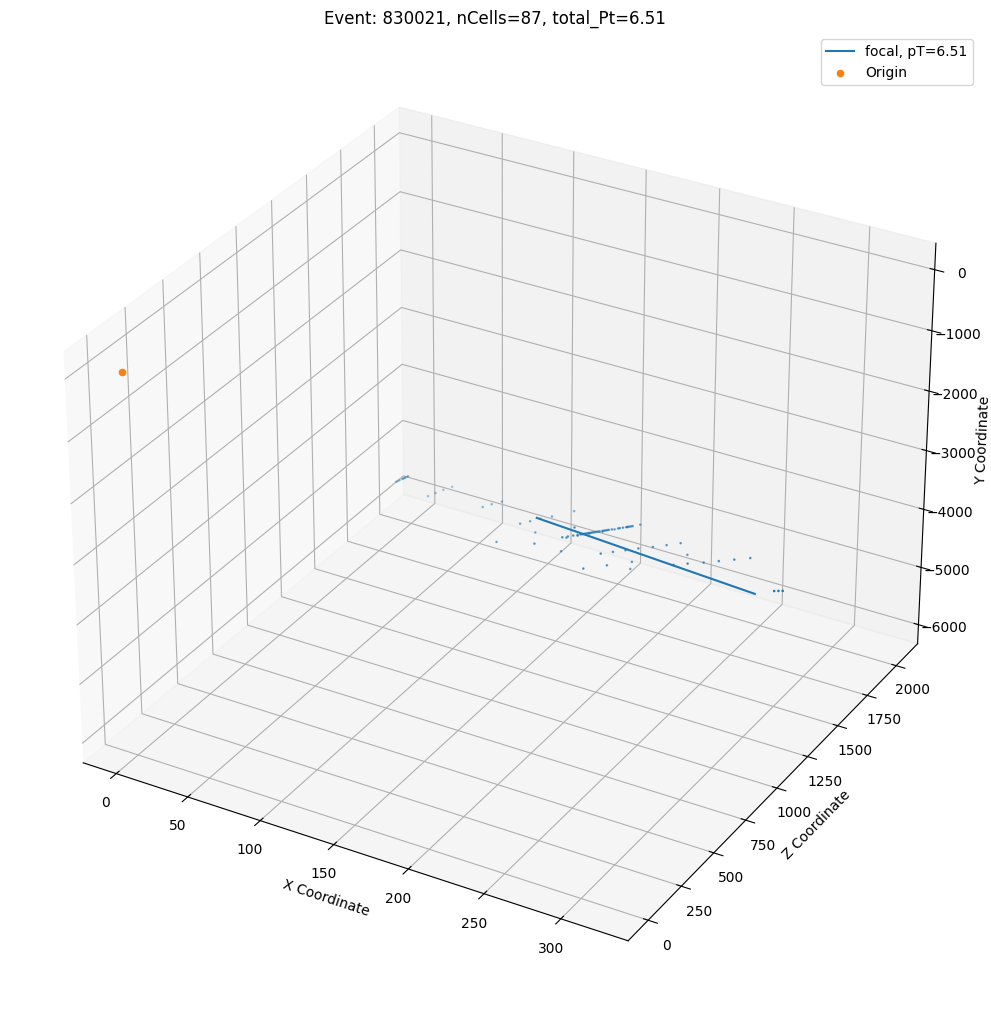

In [24]:
viz_awk(awk_arr)